In [1]:
import tensorflow as tf
import pandas as pd
import glob
import os

pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def clean_column_name(column):
    column = column.strip(' ')
    column = column.replace('/', '_')
    column = column.replace(' ', '_')
    column = column.lower()
    return column

In [5]:
DATA_DIR  = os.path.join(os.path.abspath("MachineLearningCVE"))
DATA_DIR

'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE'

In [6]:

filenames = glob.glob(os.path.join(DATA_DIR, '*.csv'))
print(filenames)
datasets = [pd.read_csv(filename) for filename in filenames]

for dataset in datasets:
    dataset.columns = [clean_column_name(column) for column in dataset.columns]

df = pd.concat(datasets, axis=0, ignore_index=True)
df.drop(labels=['fwd_header_length.1'], axis= 1, inplace=True)

['C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Friday-WorkingHours-Morning.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Monday-WorkingHours.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Tuesday-WorkingHours.pcap_ISCX.csv', 'C:\\Users\\Simmiyo\\OneDrive\\Desktop\\Daisy_ML\\MachineLearningCVE\\Wednesday-workingHours.pcap_ISCX.csv']


In [7]:
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes_s', 'flow_packets_s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets_s', 'bwd_packets_s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes_s                 float64
 15  flow_packets_s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [9]:
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
df.describe()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.263057e+06,1.433873e+04,8.456883e+03,6.364257e+02,1.084989e+06,6.

In [11]:
df.drop_duplicates(inplace=True, keep=False, ignore_index=True)

In [12]:
df.dropna(axis=0, inplace=True, how="any")

In [13]:
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.dropna(axis=0, how='any', inplace=True)

array([[<Axes: title={'center': 'destination_port'}>,
        <Axes: title={'center': 'flow_duration'}>,
        <Axes: title={'center': 'total_fwd_packets'}>,
        <Axes: title={'center': 'total_backward_packets'}>,
        <Axes: title={'center': 'total_length_of_fwd_packets'}>,
        <Axes: title={'center': 'total_length_of_bwd_packets'}>,
        <Axes: title={'center': 'fwd_packet_length_max'}>,
        <Axes: title={'center': 'fwd_packet_length_min'}>,
        <Axes: title={'center': 'fwd_packet_length_mean'}>],
       [<Axes: title={'center': 'fwd_packet_length_std'}>,
        <Axes: title={'center': 'bwd_packet_length_max'}>,
        <Axes: title={'center': 'bwd_packet_length_min'}>,
        <Axes: title={'center': 'bwd_packet_length_mean'}>,
        <Axes: title={'center': 'bwd_packet_length_std'}>,
        <Axes: title={'center': 'flow_bytes_s'}>,
        <Axes: title={'center': 'flow_packets_s'}>,
        <Axes: title={'center': 'flow_iat_mean'}>,
        <Axes: title={

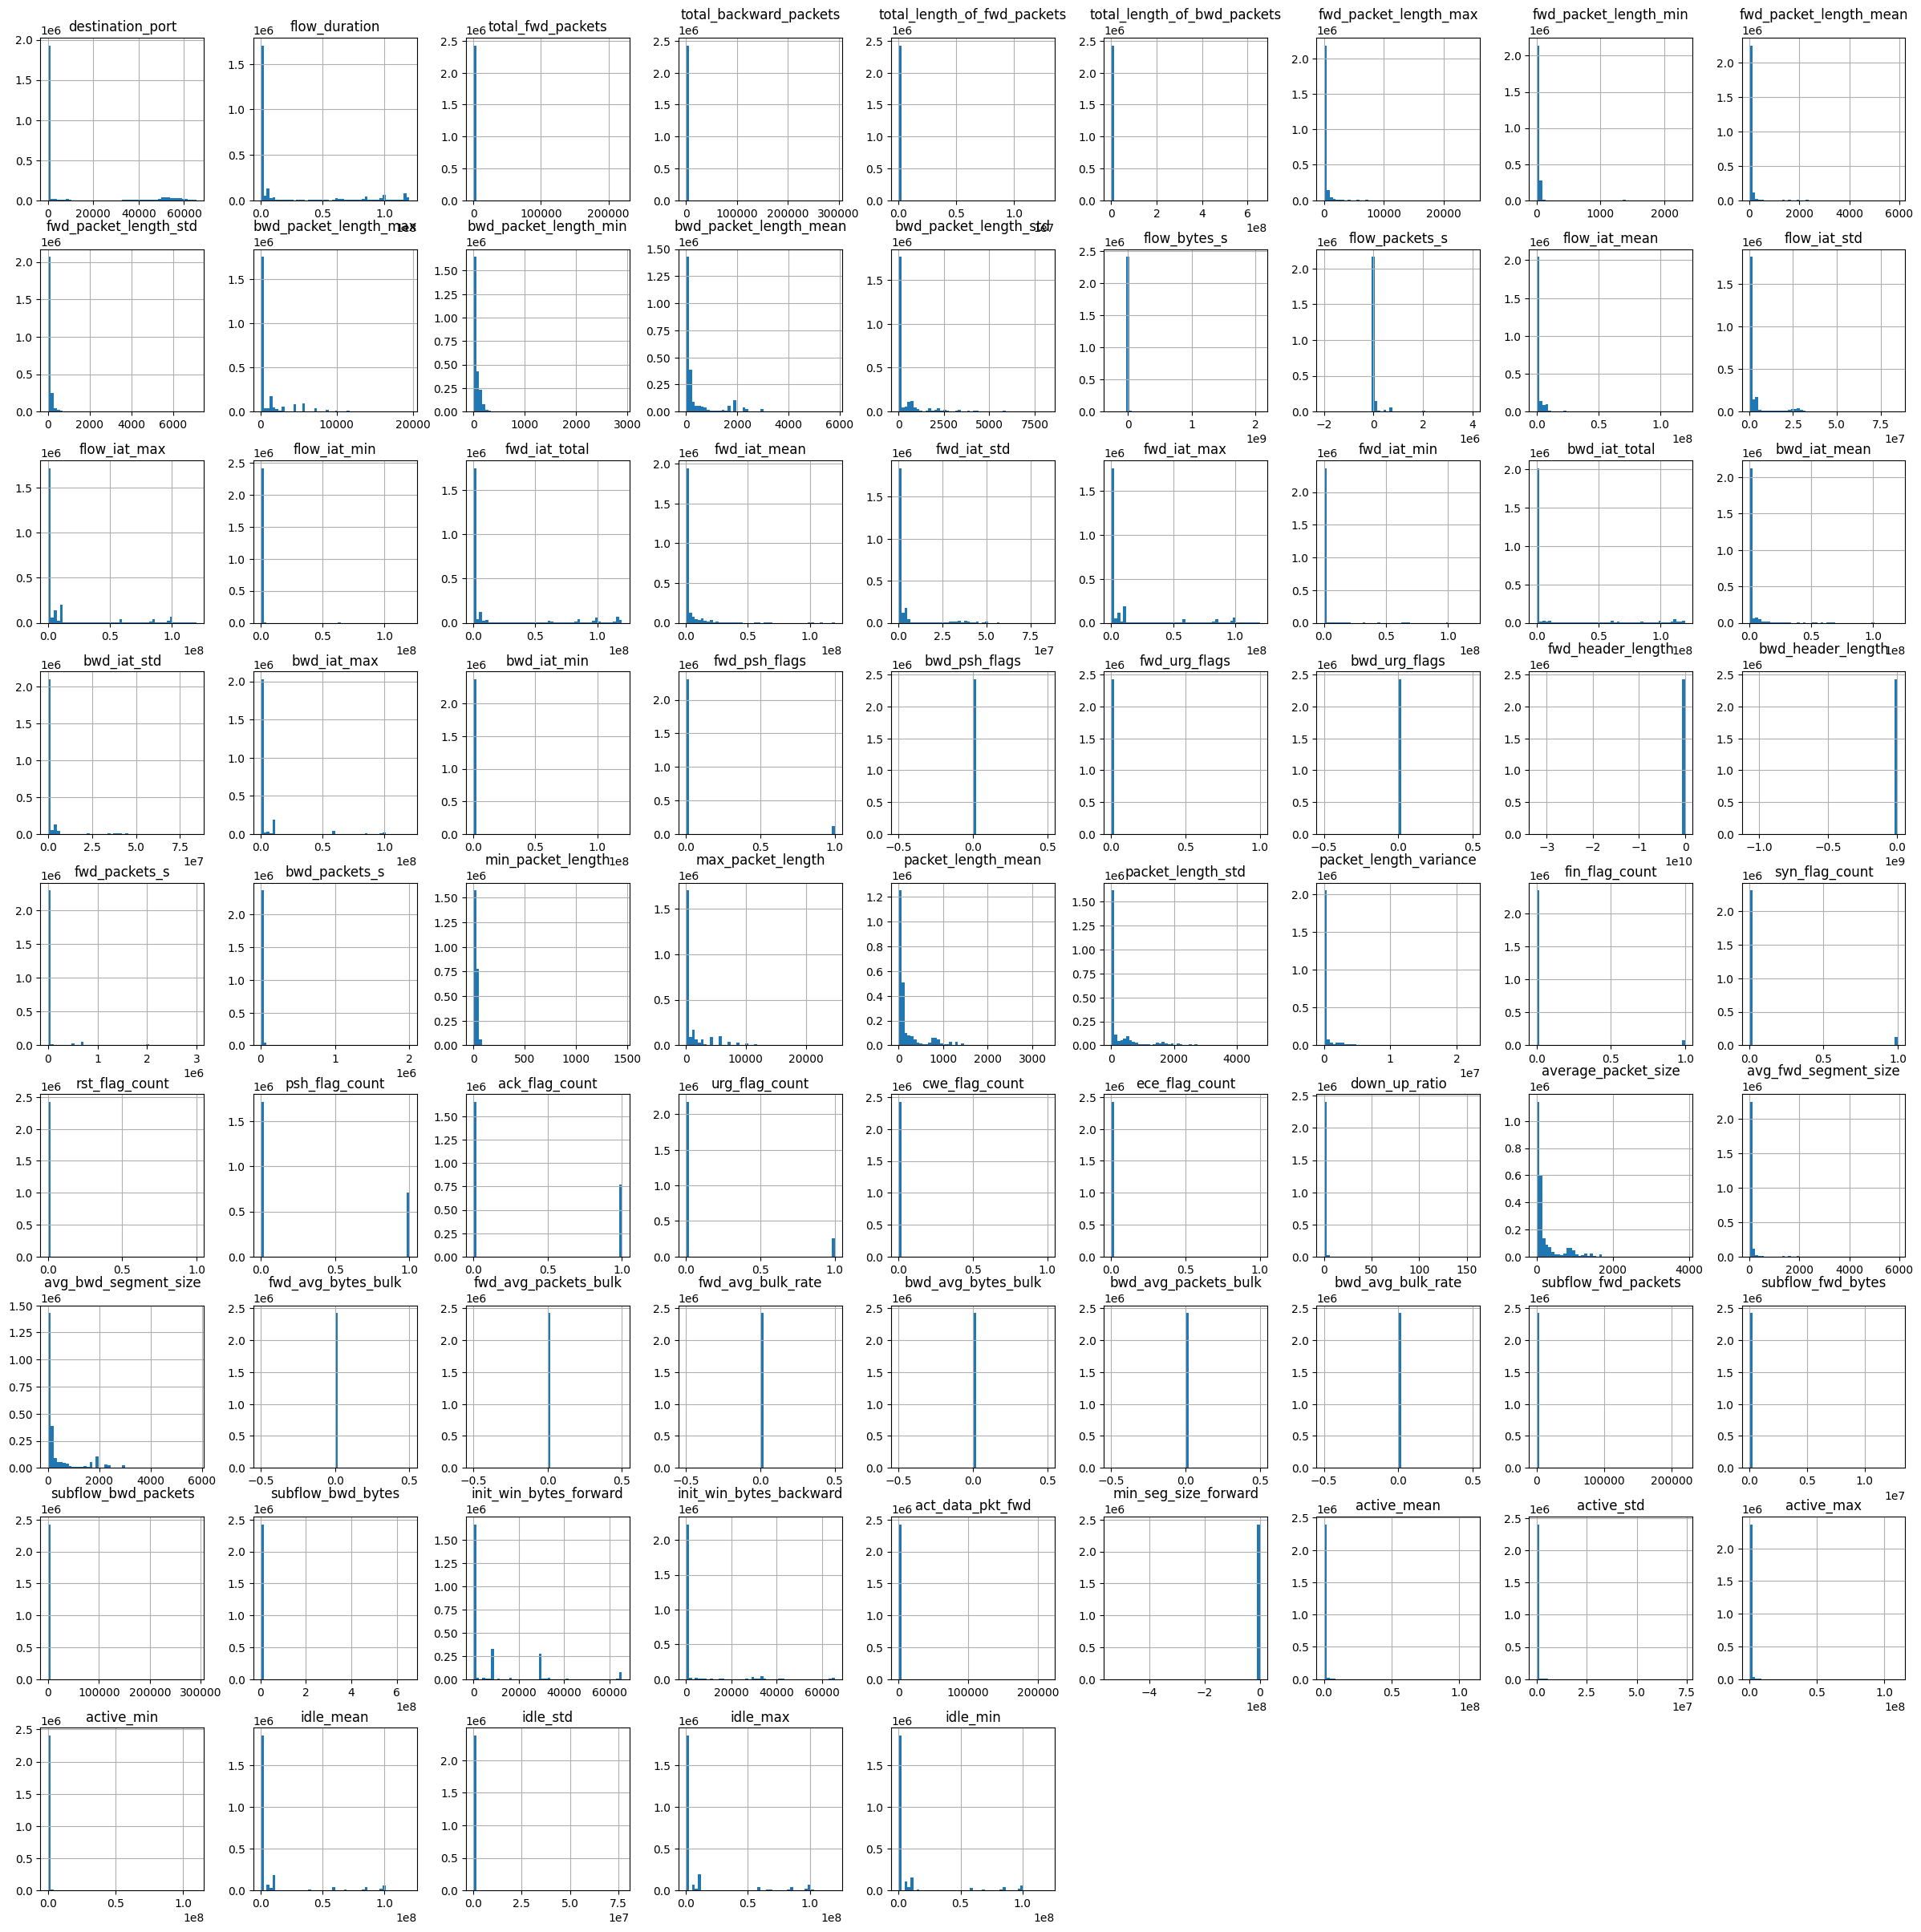

In [14]:
df.hist(bins=50, figsize=(30,30))

In [15]:
dataset_std = df.std(numeric_only=True)
constant_features = [column for column, std in dataset_std.iteritems() if std < 0.01]
df.drop(labels=constant_features, axis=1, inplace=True)

In [16]:
constant_features

['bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'cwe_flag_count',
 'fwd_avg_bytes_bulk',
 'fwd_avg_packets_bulk',
 'fwd_avg_bulk_rate',
 'bwd_avg_bytes_bulk',
 'bwd_avg_packets_bulk',
 'bwd_avg_bulk_rate']

In [17]:
df[['flow_bytes_s', 'flow_packets_s']] = df[['flow_bytes_s', 'flow_packets_s']].apply(pd.to_numeric)

In [18]:
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,9.0,6.0,0.0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,1,9.0,6.0,6.0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,9.0,6.0,0.0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
dataset_corr = df.corr()
dataset_corr.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
destination_port,1.000000,-0.178090,-0.004782,-0.004475,0.009244,-0.003482,0.089568,-0.045287,0.137028,0.121879,-0.219239,-0.263654,-0.245595,-0.196555,0.070989,0.369599,-0.117932,-0.136844,-0.135807,-0.023478,-0.177150,-0.110541,-0.115451,-0.134441,-0.056856,-0.124419,-0.078471,-0.044299,-0.064857,-0.056668,0.237590,0.000473,0.000782,0.358124,0.149979,-0.255290,-0.149467,-0.177613,-0.145432,-0.081104,-0.041081,0.237590,-0.007338,-0.230525,0.595075,0.530253,-0.007248,0.030166,-0.178935,0.137028,-0.245595,-0.004782,0.009257,-0.004475,-0.003482,-0.139428,0.205369,-0.003638,0.001035,-0.042205,-0.049612,-0.060046,-0.028370,-0.132720,0.005754,-0.128419,-0.134134
flow_duration,-0.178090,1.000000,0.020462,0.019295,0.062805,0.015930,0.259824,-0.117007,0.130725,0.221460,0.481565,-0.243456,0.443795,0.429252,-0.025242,-0.110401,0.535952,0.733196,0.778355,0.058219,0.998518,0.541269,0.719475,0.778137,0.208061,0.818963,0.406859,0.516035,0.578527,0.211515,-0.019859,-0.000073,-0.001022,-0.100572,-0.078242,-0.251586,0.497147,0.411936,0.440338,0.267885,0.217707,-0.019859,0.007805,0.189613,0.027448,-0.123445,0.007752,-0.164095,0.389336,0.130725,0.443795,0.020462,0.062887,0.019295,0.015930,0.094599,-0.038995,0.015649,-0.001191,0.183407,0.237573,0.288442,0.115824,0.762718,0.239362,0.774387,0.732606
total_fwd_packets,-0.004782,0.020462,1.000000,0.999070,0.365510,0.996994,0.008964,-0.003286,-0.000362,0.000999,0.022448,-0.006168,0.021015,0.005882,0.000382,-0.002350,-0.001498,-0.001125,0.001698,-0.000600,0.020129,-0.001484,-0.000491,0.001255,-0.001339,0.023699,-0.000977,0.000367,0.002975,-0.001198,0.001854,0.000477,0.013751,-0.002157,-0.001584,-0.006904,0.021627,0.024150,0.011500,0.005015,-0.001402,0.001854,0.000331,0.007357,0.001254,-0.003916,0.000330,0.000982,0.021765,-0.000362,0.021015,1.000000,0.365992,0.999070,0.996988,0.003782,-0.000762,0.887386,-0.000180,0.039778,0.008161,0.030264,0.041149,0.001243,0.000626,0.001322,0.001113
total_backward_packets,-0.004475,0.019295,0.999070,1.000000,0.359459,0.994430,0.008669,-0.002858,-0.000706,0.000643,0.022256,-0.005440,0.021156,0.005575,0.000336,-0.002378,-0.001834,-0.001581,0.001258,-0.000623,0.018944,-0.001652,-0.001004,0.000800,-0.001203,0.023138,-0.001124,0.000175,0.003069,-0.001148,0.001653,0.000758,0.013767,-0.002240,-0.001310,-0.006247,0.021380,0.024589,0.011373,0.004998,-0.001241,0.001653,0.000207,0.006750,0.001104,-0.003261,0.000206,0.003366,0.022214,-0.000706,0.021156,0.999070,0.359941,1.000000,0.994425,0.003208,-0.000754,0.882565,0.000022,0.038814,0.006276,0.028418,0.041153,0.000876,0.000318,0.000900,0.000800
total_length_of_fwd_packets,0.009244,0.062805,0.365510,0.359459,1.000000,0.353788,0.195956,-0.001954,0.184861,0.158547,0.019878,-0.028340,0.015538,0.006820,0.002115,-0.011918,0.002212,0.011905,0.024129,-0.003094,0.061992,0.003732,0.020522,0.024218,-0.006369,0.075494,0.006048,0.034555,0.039836,-0.0053

In [20]:
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
tri_df = dataset_corr.mask(mask)

correlated_features = [c for c in tri_df.columns if any(tri_df[c] > 0.98)]

df.drop(labels=correlated_features, axis=1, inplace=True)

In [21]:
correlated_features

['flow_duration',
 'total_fwd_packets',
 'total_backward_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_mean',
 'bwd_packet_length_max',
 'bwd_packet_length_mean',
 'flow_packets_s',
 'flow_iat_max',
 'fwd_iat_max',
 'fwd_psh_flags',
 'max_packet_length',
 'packet_length_mean',
 'rst_flag_count',
 'subflow_fwd_packets',
 'subflow_bwd_packets',
 'idle_mean']

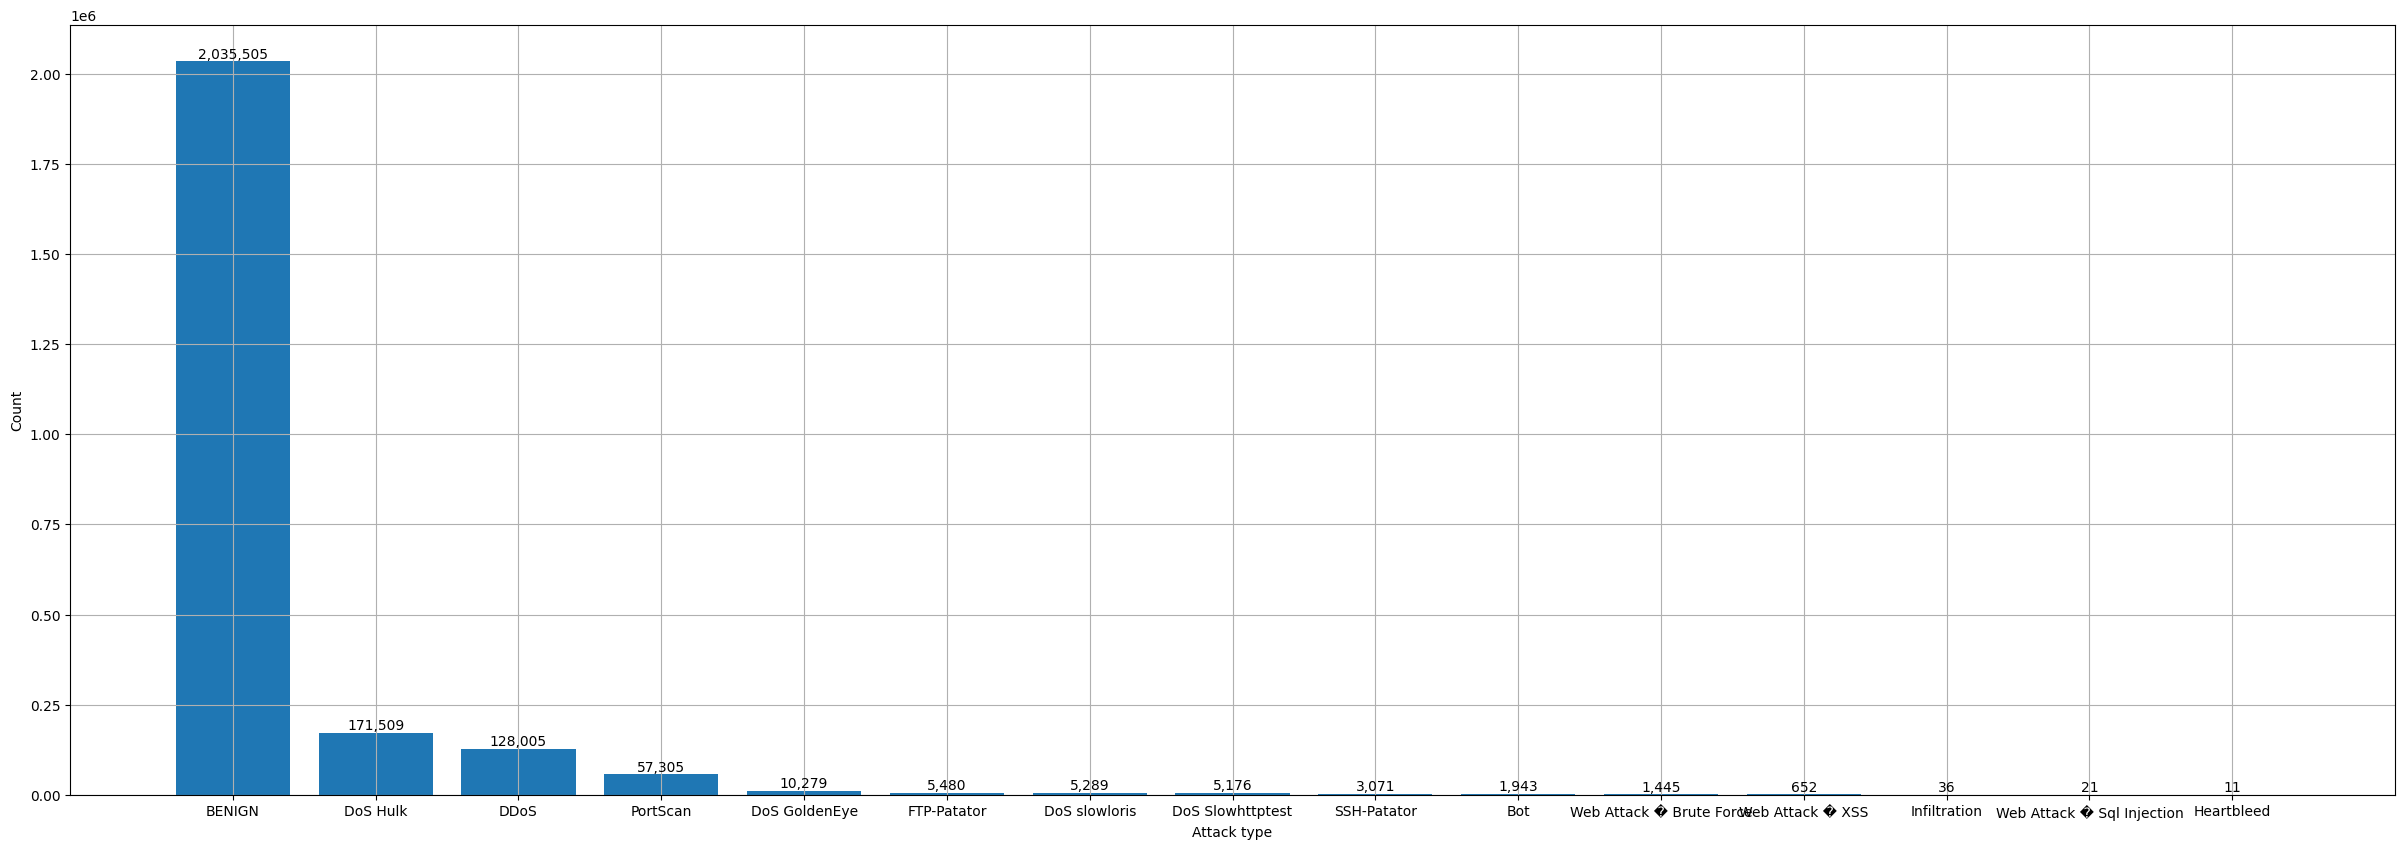

In [22]:
fig = plt.figure(figsize=(30, 10))

attack = df['label'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.xlabel('Attack type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [23]:
df['label'] = df['label'].str.replace('Web Attack �', 'Web Attack', regex=False)

attack_group = {
    'BENIGN': 'Benign',
    'PortScan': 'PortScan',
    'DDoS': 'DoS/DDoS',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS', 
    'DoS Slowhttptest': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Botnet ARES',
    'Web Attack Brute Force': 'Web Attack',
    'Web Attack Sql Injection': 'Web Attack',
    'Web Attack XSS': 'Web Attack',
    'Infiltration': 'Infiltration'
}

df['label_category'] = df['label'].map(lambda x: attack_group[x])
df['label_category'].value_counts()

Benign          2035505
DoS/DDoS         320269
PortScan          57305
Brute Force        8551
Web Attack         2118
Botnet ARES        1943
Infiltration         36
Name: label_category, dtype: int64

In [24]:
benign_rows = df[df['label_category']=='Benign']
attack_rows = df[df['label_category']!='Benign']

In [25]:
benign_rows = benign_rows.sample(n=len(attack_rows)-50000, random_state=101)
df = pd.concat([benign_rows,attack_rows],axis=0)

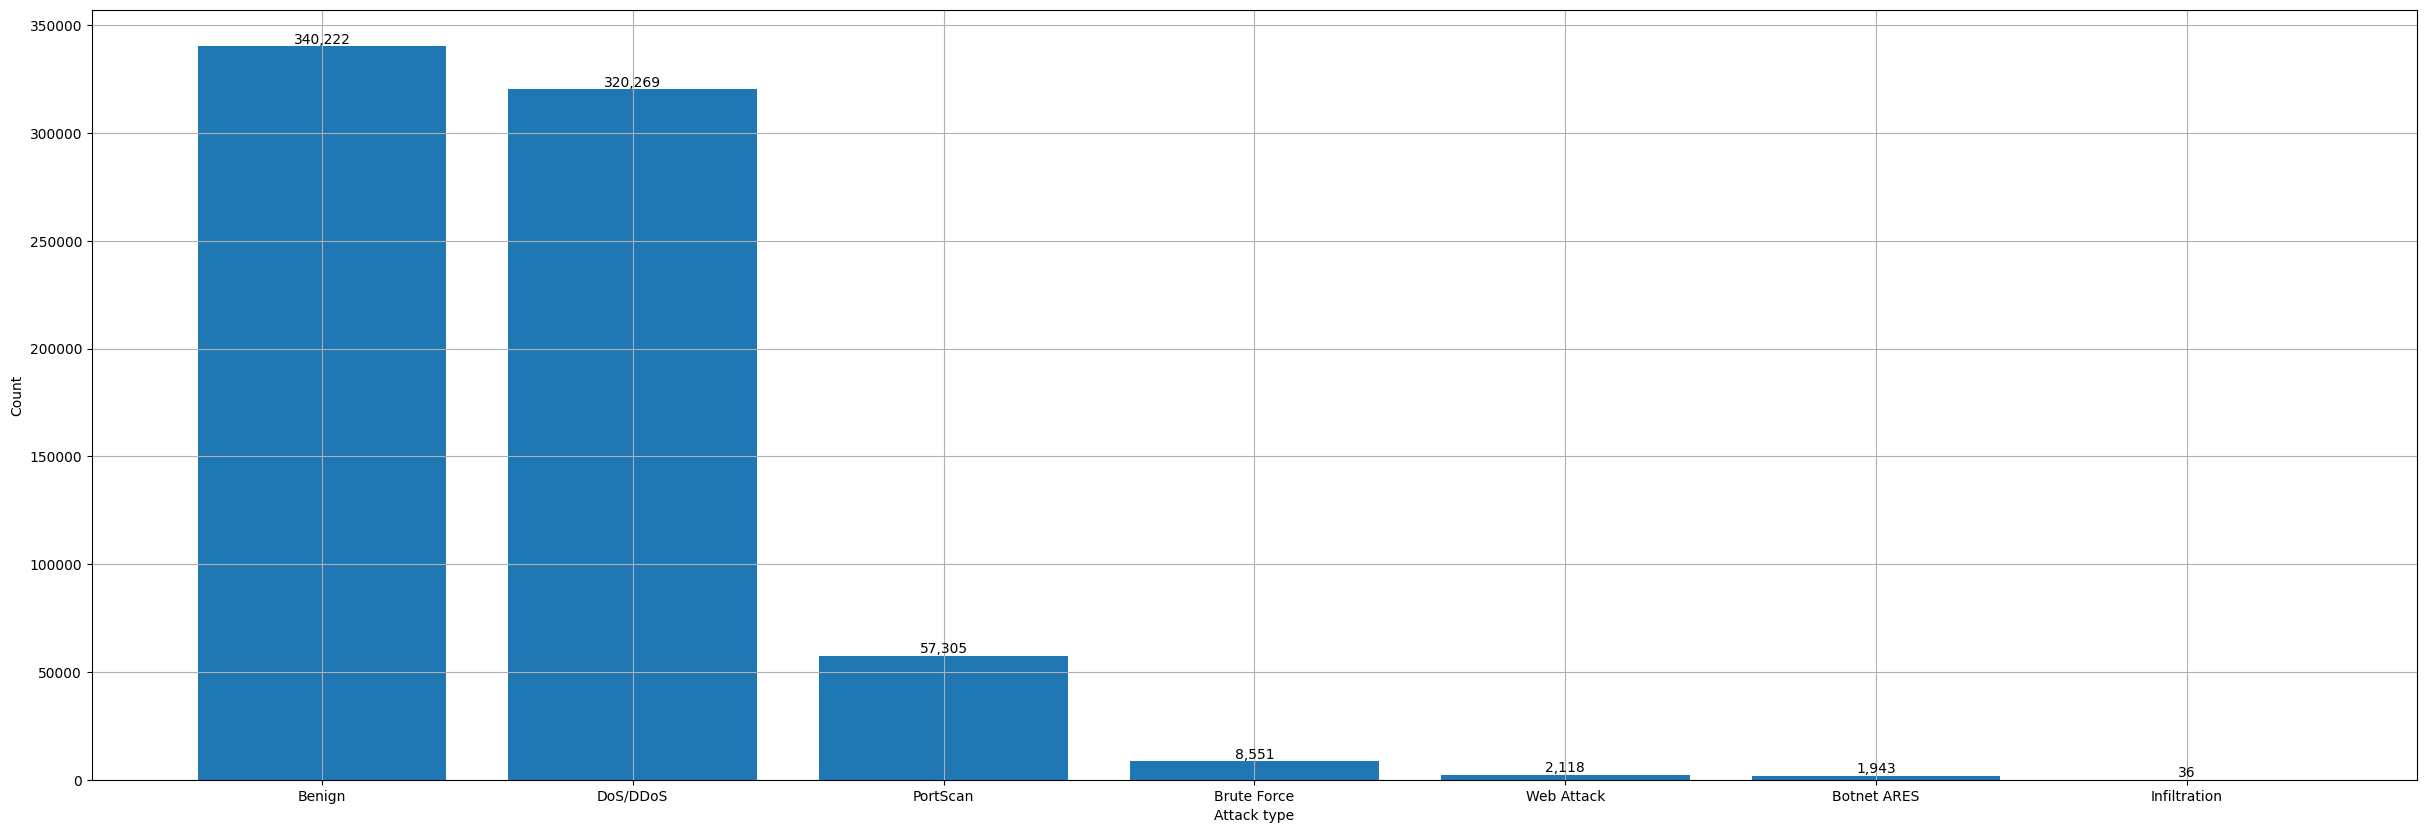

In [26]:
fig = plt.figure(figsize=(30, 10))

attack = df['label_category'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.xlabel('Attack type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [27]:
labels = df['label_category']
features = df.drop(labels=['label', 'label_category'], axis=1)
features.columns

Index(['destination_port', 'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_std', 'bwd_packet_length_min',
       'bwd_packet_length_std', 'flow_bytes_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean',
       'fwd_iat_std', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets_s', 'bwd_packets_s',
       'min_packet_length', 'packet_length_std', 'packet_length_variance',
       'fin_flag_count', 'syn_flag_count', 'psh_flag_count', 'ack_flag_count',
       'urg_flag_count', 'ece_flag_count', 'down_up_ratio',
       'average_packet_size', 'avg_fwd_segment_size', 'avg_bwd_segment_size',
       'subflow_fwd_bytes', 'subflow_bwd_bytes', 'init_win_bytes_forward',
       'init_win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'active_mean', 'active_std', 'active_max', 'active_min', 'idle_std',
   

In [28]:
features.pop('idle_std')
features.pop('idle_min')
features.pop('bwd_iat_min')
features.pop('fwd_iat_mean')
features.pop('fwd_packet_length_min')
features.pop('fwd_packet_length_std')
features.pop('active_max')
features.pop('active_min')
features.pop('active_std')
features.pop('active_mean')
features.pop('ece_flag_count')
features.pop('urg_flag_count')
features.pop('bwd_iat_total')

100788     81600000
753055            0
1210603           0
2240418       65835
849673            0
             ...   
2427106    11500000
2427112    11500000
2427148    11500000
2427175    11500000
2427186    11500000
Name: bwd_iat_total, Length: 730444, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)
X_train.shape, X_test.shape


((511310, 36), (219134, 36))

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [31]:
numeric_features = features.columns

preprocessor = ColumnTransformer(transformers=[
    ('numericals', QuantileTransformer(), numeric_features)
])

In [32]:
columns = numeric_features.tolist()

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=columns)

In [33]:
le = LabelEncoder()

y_train = pd.DataFrame(le.fit_transform(y_train), columns=["label"])
y_test = pd.DataFrame(le.transform(y_test), columns=["label"])

In [35]:
X_train.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features.pkl'))
X_test.to_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features.pkl'))

y_train.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_labels.pkl'))
y_test.to_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_labels.pkl'))

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511310 entries, 0 to 511309
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   destination_port         511310 non-null  float64
 1   fwd_packet_length_max    511310 non-null  float64
 2   bwd_packet_length_min    511310 non-null  float64
 3   bwd_packet_length_std    511310 non-null  float64
 4   flow_bytes_s             511310 non-null  float64
 5   flow_iat_mean            511310 non-null  float64
 6   flow_iat_std             511310 non-null  float64
 7   flow_iat_min             511310 non-null  float64
 8   fwd_iat_total            511310 non-null  float64
 9   fwd_iat_std              511310 non-null  float64
 10  fwd_iat_min              511310 non-null  float64
 11  bwd_iat_mean             511310 non-null  float64
 12  bwd_iat_std              511310 non-null  float64
 13  bwd_iat_max              511310 non-null  float64
 14  fwd_

In [37]:
X_train.describe()

,destination_port,fwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_std,flow_bytes_s,flow_iat_mean,flow_iat_std,flow_iat_min,fwd_iat_total,fwd_iat_std,fwd_iat_min,bwd_iat_mean,bwd_iat_std,bwd_iat_max,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,psh_flag_count,ack_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_bytes,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,idle_max
count,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.00000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000,511310.000000
mean,0.500598,0.489460,0.277691,0.361636,0.495369,0.502208,0.471309,0.497833,0.480821,0.421828,0.473119,0.433707,0.362511,0.430927,0.497944,0.490873,0.504691,0.490138,0.301074,0.479531,0.480998,0.085361,0.031232,0.339411,0.377560,0.41373,0.495639,0.490890,0.481853,0.495304,0.480998,0.480694,0.440707,0.467073,0.504105,0.300465
std,0.270030,0.299464,0.396722,0.391901,0.292722,0.288736,0.324858,0.286287,0.314326,0.369466,0.322589,0.360133,0.391672,0.358599,0.288479,0.302931,0.289594,0.304479,0.398653,0.316543,0.316160,0.279419,0.173943,0.473510,0.484777,0.35352,0.294223,0.300040,0.318199,0.299278,0.317944,0.315991,0.349427,0.328091,0.256898,0.399282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455455,0.230731,0.000000,0.000000,0.252004,0.252093,0.248107,0.268769,0.260260,0.000000,0.315816,0.000000,0.000000,0.000000,0.217718,0.210210,0.255783,0.248199,0.000000,0.246246,0.251251,0.000000,0.000000,0.000000,0.000000,0.00000,0.243243,0.237237,0.288789,0.262262,0.271271,0.242242,0.000000,0.000000,0.273774,0.000000
50%,0.455455,0.493994,0.000000,0.000000,0.497480,0.501666,0.496521,0.506507,0.505318,0.501489,0.503003,0.500501,0.000000,0.493493,0.508509,0.482482,0.505377,0.493794,0.000000,0.497620,0.499950,0.000000,0.000000,0.000000,0.000000,0.68018,0.498248,0.500000,0.507239,0.506006,0.505506,0.476977,0.494257,0.405906,0.273774,0.000000
75%,0.766767,0.748749,0.733734,0.750751,0.747163,0.752777,0.748248,0.744244,0.742511,0.754005,0.745245,0.749006,0.750754,0.744069,0.748749,0.792793,0.756623,0.752134,0.737237,0.750139,0.748616,0.000000,0.000000,1.000000,1.000000,0.68018,0.751568,0.749750,0.797297,0.751752,0.759259,0.759259,0.739740,0.767768,0.766767,0.754750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
y_train.value_counts()

label
0        238155
3        224188
5         40113
2          5986
6          1483
1          1360
4            25
dtype: int64